# predicting numbers in image with logistic regression

### loading libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
%matplotlib inline

### loading data

In [2]:
digits = load_digits()
digits.data


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [3]:
digits.data.shape

(1797, 64)

### determining the total number of images and labels

In [4]:
print('Image Data shape',digits.data.shape)
print('Label Data shape',digits.target.shape)

Image Data shape (1797, 64)
Label Data shape (1797,)


### displaying some of the images and labels

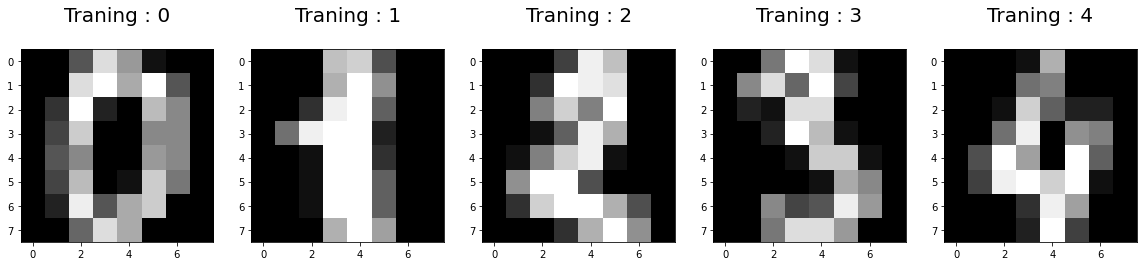

In [5]:
plt.figure(figsize=(20,4))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index + 1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Traning : %i\n' %label,fontsize=20)

### splitting data into trining and testing sets

In [6]:
X_train,X_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.25,random_state=2)

### loading the model

In [15]:
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train,y_train)

C:\Users\rb186083\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

### making prediction of our first element of test set

In [8]:
print(log_reg.predict(X_test[0].reshape(1,-1)))

[4]


### predicting output of first 10 elements of test set

In [9]:
print(log_reg.predict(X_test[0:10]))

[4 0 9 1 8 7 1 5 1 6]


### predicted output of test set

In [10]:
preds = log_reg.predict(X_test)

### determining the accuracy of the model

In [11]:
score = log_reg.score(X_test,y_test)
print(score)

0.9533333333333334


### representing the confusion_matrix as heatmap

In [12]:
cm = confusion_matrix(y_test,preds)
print(cm)

[[41  0  0  0  1  0  0  0  0  0]
 [ 0 47  0  1  0  0  0  0  1  1]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  1  0  1  2  0]
 [ 0  0  0  0 36  0  0  0  3  1]
 [ 0  1  0  0  1 49  0  0  0  1]
 [ 0  1  0  0  0  0 41  0  1  0]
 [ 0  0  0  0  0  0  0 49  0  0]
 [ 0  0  0  0  0  0  0  0 39  1]
 [ 0  0  0  1  0  1  0  0  1 36]]


Text(0.5, 1.0, 'Accuracy Score : 0.9533333333333334')

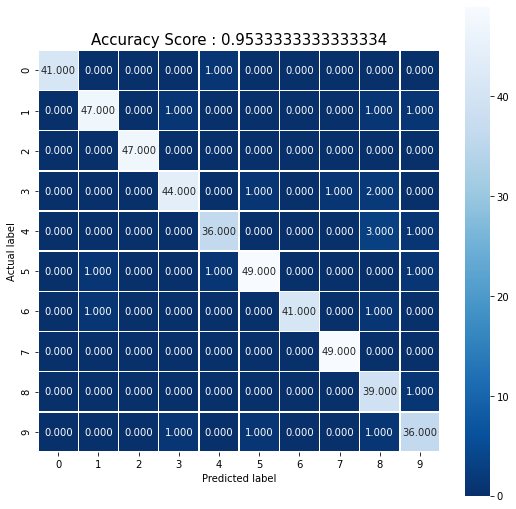

In [13]:

plt.figure(figsize=(9,9))
sns.heatmap(cm,annot=True,fmt=".3f",linewidth=0.5,square = True,cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title='Accuracy Score : {0}'.format(score)
plt.title(all_sample_title,size=15)

### printing out sample correct outputs

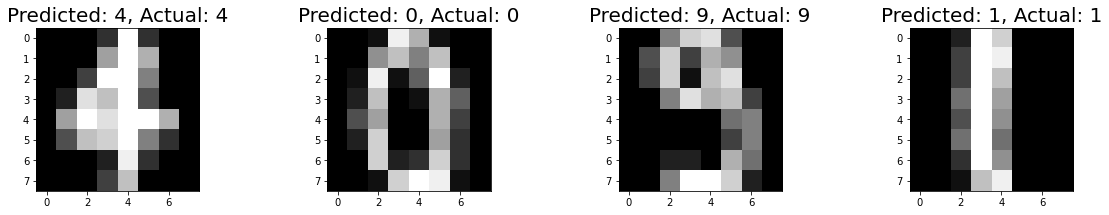

In [14]:
index = 0
classifiedIndex = []
for predict,actual in zip(preds,y_test):
    if predict==actual:
        classifiedIndex.append(index)
    index +=1
plt.figure(figsize=(20,3))
for plotIndex,wrong in enumerate(classifiedIndex[0:4]):
    plt.subplot(1,4,plotIndex +1)
    plt.imshow(np.reshape(X_test[wrong],(8,8)),cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(preds[wrong],y_test[wrong]),fontsize=20)